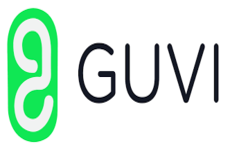

ML-1 Insurance Data.
Presented By: Santoshi kumari mishra

## **Table of Contents**



1).Problem Statement
2)Importing Packages
3)Data Loading and Description
4)EDA
4.1 Pandas Profiling
5)Linear Regression
5.1 Standardization
5.2 Preparing x and y
5.3 Linear regression in scikit-learn
5.4 Calculating intercept and coefficients
5.5 Model Prediction
6)Model Evaluation




**1. Problem Statement**

In this Insurance Dataset 'charges' is the Target Variable, Insurance of individual varies with following factores such as age, smoker, bmi, sex, no.of children. In the following data set we are suppose to predict the charges with respect to the factors affecting it.

1.Finding the ML-Algo which can Predict the Insurance Charges.
2.What are the parameters which affect the most in insurance charges?
3.Is there any relation between bmi and smoker with insurance chrges ?

**2. Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

**3. Data Loading and Description**

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**Observations:**

**-Explanatory Variables:**

age, sex, bmi, children, smoker, region.

**-Target Variable:**

charges.
There are no missing values.
Range of Age are 18 to 64.
Region is not giving much info so it can be dropped.

**4. EDA**

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df[df.duplicated(keep='first')]
df.drop_duplicates(inplace=True)

By .**Describe **function can see their are no missing values in the data set and checking for the duplicates if any and removing it.

In [7]:
df.region.value_counts()     # Here Cardinality do not give much information and help in predicting the Insurance Charges.  

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [8]:
df.drop('region',axis=1, inplace=True)

In [9]:
df.head(2)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.9240
1,18,male,33.77,1,no,1725.5523


Rounding the charges column upto 2 decimal point.

In [10]:
df= df.round(2)

In [11]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.92
1,18,male,33.77,1,no,1725.55
2,28,male,33.00,3,no,4449.46
3,33,male,22.70,0,no,21984.47
4,32,male,28.88,0,no,3866.86


**4.1 Pandas Profiling**

In [12]:
pip install pandas-profiling

In [13]:
import pandas_profiling

In [14]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [15]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)


In [16]:
profile= ProfileReport(df,title="IR",explorative=True)

In [17]:
profile.to_file("IR.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
profile =df.profile_report(title='IR')
profile.to_file(output_file='IR.html')
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Observation:**

1)The data set includes 5 Numerical, 1 Bool, 1 Categorical
2)7 variables including index
3)No Missing and Dublicate values





**BMI:**

Minimum: 15.96
Maximum: 53.13 
To understand the Body Mass Index and the effect of BMI on the Insurance charges the below scale is helpful.
















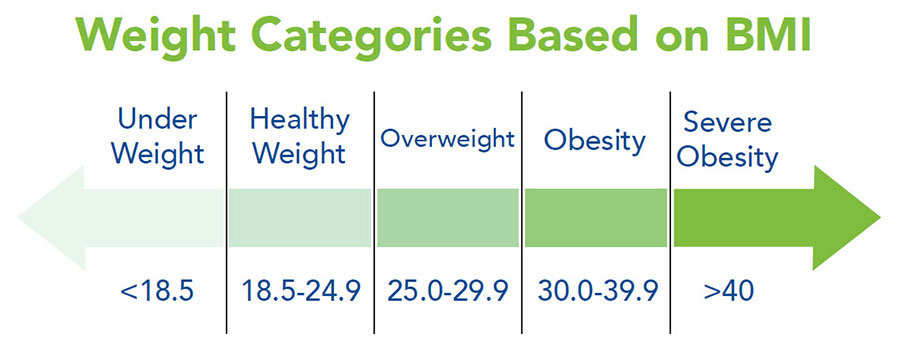

**Warnings:** children columns has in total 573 zeros which is (42.9%).

Which is **Acceptable,**

In [27]:
sns.pairplot(df, hue='smoker')

plt.show()

In [24]:
import seaborn as sns

In [20]:
sns.pairplot(df, x_vars= ['age','bmi','smoker'],y_vars=['charges'])

In [21]:
sns.pairplot(data= df,hue='smoker',x_vars= 'age' , y_vars='charges',aspect=1, height=5)
sns.lmplot(data= df,x= 'bmi' , y='charges' , hue='smoker')

In [22]:
sns.lmplot(x='bmi' , y='charges' , data=df, col= 'sex',  hue='smoker', markers=['o','x'])

In [24]:
sns.scatterplot(data=df, x='bmi',y='charges',hue='smoker')

**Hence the above plot gives the answer to our problem statement.**



SMOKER affects the most in the insurance charges.
Irrespective of high or low bmi if a person is a smoker its insurance charges is increasing Significantly.
Which is Same for both Male and Female.

In [25]:
df['smoker'].value_counts().plot(kind='pie', autopct= '%3.1f%%',figsize=(12,12), legend=True, cmap='tab20c', fontsize=15)

In [26]:
f, axes = plt.subplots(2, 2, figsize=(15, 15)) 

sns.scatterplot(data=df, x='charges',y='bmi',hue='smoker', ax=axes[0,0])# Set up the matplotlib figure

sns.scatterplot(data=df,x='age',y='charges', hue='smoker', ax=axes[0,1])

sns.lineplot(data=df,x='age',y='bmi', hue='smoker', ax=axes[1,0])

sns.swarmplot(x='sex',y='charges',data=df, hue= 'smoker' )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


**Fig 1:**

non smoker- In most cases the charges for non smoker is approximatly starting from 2000 till 13000 which is in the range even if the bmi is increasing. There are only few cases where charges are going high till 35000 between the bmi range 25 to 43.

**smoker-** The Maximum charger of non smoker is the min charges for a smoker as the graph shows smoking is highly affecting the charges. The value of charges incresing rapidly with the increase in bmi, so there is a relation between smoker and bmi, with increse in bmi for smoker the chrges are also incresing.

**Fig 2:** With increase in age there is a marginal increase in charges for smoker and non smoker few cases where its ranging from 12k to 30k. As shown in figure the charges of smoker is high with respect to age.

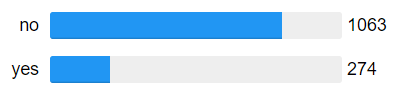

**Fig 3:** non smoker bmi is quite good as comapred to smoker.

**Fig 4:** This plot shows the charges for male and female with respect to smoke can see non smokers charges are low and number of count is high. For smokers number of count is low but their charges are high.

In [27]:
corr= df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109347,0.041536,0.298308
bmi,0.109347,1.000000,0.012762,0.198391
children,0.041536,0.012762,1.000000,0.067389
charges,0.298308,0.198391,0.067389,1.000000


In [28]:
sns.heatmap(corr, cmap= 'viridis_r', annot=True)

**5. Linear Regression**

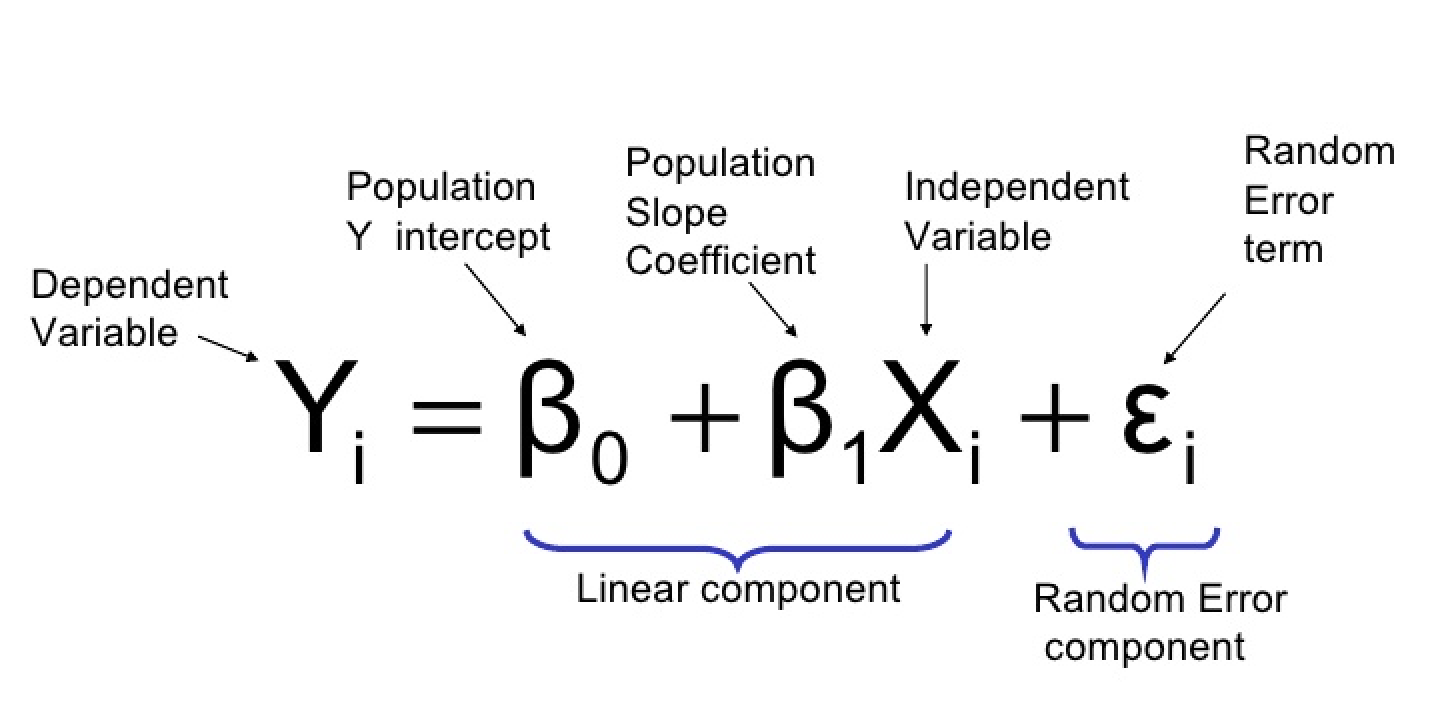

We are using Linear Regression to predict the Insurance Charges which is continuous in nature

In [29]:
df.head(2)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.92
1,18,male,33.77,1,no,1725.55


**Dummification of categorical variable**

In order to split the data into X and y and to apply Linear Regression we need to Dummify the columns sex and smokers and deleting the first variable in each column to minimise complexity.

In [30]:
df1 = pd.get_dummies(df,drop_first=True)
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.90,0,16884.92,0,1
1,18,33.77,1,1725.55,1,0
2,28,33.00,3,4449.46,1,0
3,33,22.70,0,21984.47,1,0
4,32,28.88,0,3866.86,1,0


**5.1 Standardization**

Fitting is determining what to do


Transforming actually doing it






In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df1)
data1 = scaler.transform(df1)

In [32]:
data1= pd.DataFrame(data1)
data1

,0,1,2,3,4,5
0,-1.440418,-0.453206,-0.909234,0.297856,-1.009771,1.969660
1,-1.511647,0.509412,-0.079442,-0.954381,0.990324,-0.507702
2,-0.799350,0.383141,1.580143,-0.729373,0.990324,-0.507702
3,-0.443201,-1.305951,-0.909234,0.719104,0.990324,-0.507702
4,-0.514431,-0.292496,-0.909234,-0.777498,0.990324,-0.507702
...,...,...,...,...,...,...
1332,0.767704,0.050242,1.580143,-0.221263,0.990324,-0.507702
1333,-1.511647,0.206032,-0.909234,-0.914695,-1.009771,-0.507702
1334,-1.511647,1.014500,-0.909234,-0.962288,-1.009771,-0.507702
1335,-1.297958,-0.797584,-0.909234,-0.931054,-1.009771,-0.507702


In [33]:
data1.columns = ['age','bmi','children','charges','sex_male','smoker_yes']
data1.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,-1.440418,-0.453206,-0.909234,0.297856,-1.009771,1.969660
1,-1.511647,0.509412,-0.079442,-0.954381,0.990324,-0.507702
2,-0.799350,0.383141,1.580143,-0.729373,0.990324,-0.507702
3,-0.443201,-1.305951,-0.909234,0.719104,0.990324,-0.507702
4,-0.514431,-0.292496,-0.909234,-0.777498,0.990324,-0.507702


**5.2 Preparing x and y**

splitting the data set into x (**Explanatory Variable**) and y (**Target Variable**)

In [34]:
x= data1[['age','bmi','children','sex_male','smoker_yes']]
x

,age,bmi,children,sex_male,smoker_yes
0,-1.440418,-0.453206,-0.909234,-1.009771,1.969660
1,-1.511647,0.509412,-0.079442,0.990324,-0.507702
2,-0.799350,0.383141,1.580143,0.990324,-0.507702
3,-0.443201,-1.305951,-0.909234,0.990324,-0.507702
4,-0.514431,-0.292496,-0.909234,0.990324,-0.507702
...,...,...,...,...,...
1332,0.767704,0.050242,1.580143,0.990324,-0.507702
1333,-1.511647,0.206032,-0.909234,-1.009771,-0.507702
1334,-1.511647,1.014500,-0.909234,-1.009771,-0.507702
1335,-1.297958,-0.797584,-0.909234,-1.009771,-0.507702


In [35]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(1337, 5)


In [36]:
y = data1.charges
y

0       0.297856
1      -0.954381
2      -0.729373
3       0.719104
4      -0.777498
          ...   
1332   -0.221263
1333   -0.914695
1334   -0.962288
1335   -0.931054
1336    1.310297
Name: charges, Length: 1337, dtype: float64

In [37]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1337,)


**Splitting x and y into training and test datasets.**

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [39]:
print(x_train.shape)
print(x_test.shape)

(1069, 5)
(268, 5)


In [40]:
print(y_train.shape)
print(y_test.shape)

(1069,)
(268,)


**5.3 Linear regression in scikit-learn**

In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train , y_train)

LinearRegression()

**5.4 Calculating intercept and coefficients**

In [42]:
print('Intercept:',linreg.intercept_)        
print('Coefficients:',linreg.coef_) 

Intercept: -0.003236256168868379
Coefficients: [0.29760083 0.16159584 0.04572302 0.00450241 0.80114468]


In [43]:
feature_cols = ['age','bmi','children','sex_male','smoker_yes']       

**zipping** the features to pair the feature names with the coefficients.

In [44]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)

In [45]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.003236256168868379
age 0.2976008263592081
bmi 0.16159584054388998
children 0.045723017361235324
sex_male 0.00450241234351796
smoker_yes 0.8011446823448573


**5.5 Model Prediction**

In [46]:
y_pred_train = linreg.predict(x_train)  
y_pred_train

array([-0.45285007, -0.68877156,  1.05777028, ..., -0.72403051,
       -0.15035672,  1.73166891])

In [47]:
y_pred_test = linreg.predict(x_test)
print(y_pred_test)
print(y_pred_test.shape)

[ 1.56288168e-01 -5.40692107e-01 -3.31496653e-01 -2.94406563e-01
  1.39004797e+00 -3.32629150e-01  9.82927395e-02 -2.67225792e-01
 -2.80608170e-02  1.50672819e-01  2.01688414e-01 -1.13240777e-01
 -2.39810551e-01  1.44384777e+00 -4.27218471e-01 -7.58824907e-02
 -1.26933593e-01 -9.98508042e-01 -9.58937020e-02 -5.64142991e-01
 -1.04413534e-02  1.03815948e+00 -3.58310458e-01 -9.56018040e-01
 -1.74749447e-01 -1.20136748e-01  1.15039305e-01 -3.38744039e-01
 -3.44005203e-01 -1.00751329e+00 -9.81596245e-02 -5.40083499e-01
  2.14661431e+00 -3.88234392e-01  1.28997701e+00 -4.06517419e-01
 -2.05448926e-01  1.23843617e+00 -6.46295050e-01  8.37366273e-03
 -7.28175362e-01 -7.04407354e-01  1.93505494e+00 -1.01100864e+00
  1.55824969e+00 -1.88898059e-01  1.50822813e+00 -4.69508231e-01
 -3.18371617e-01  1.48916281e+00  1.30262617e-01  2.00621788e+00
  1.41445568e+00 -7.02490224e-01  1.64401213e+00 -5.06584402e-01
  1.28668411e+00  1.75421366e+00  1.35092507e+00 -9.54041544e-01
 -7.37367862e-02 -5.66786

In [48]:
from sklearn import metrics
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df

,Actual,Predicted
443,1.239798,0.156288
198,-0.300258,-0.540692
1142,-0.573364,-0.331497
935,1.555411,-0.294407
953,0.555972,1.390048
...,...,...
846,-0.895524,-0.230545
606,1.024272,1.762283
1121,2.757541,2.098717
574,-0.004548,0.093003


**6. Model Evaluation**

**Using RMSE**

In [49]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
RMSE_test

0.5374949360864095

In [50]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_train
print('RMSE for Training data is {}. \nRMSE for Test data is {}'.format(RMSE_train, RMSE_test))

RMSE for Training data is 0.49093338111730883. 
RMSE for Test data is 0.5374949360864095


In [51]:
print('RMSE for Training data is {}. \nRMSE for Test data is {}'.format(RMSE_train, RMSE_test))

RMSE for Training data is 0.49093338111730883. 
RMSE for Test data is 0.5374949360864095


**Using R Square:**

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)


0.723917113376922

**Adjusted R-Square**

In [53]:
SS_Residual = sum((y_test-y_pred_test)**2)

SS_Total = sum((y_test-np.mean(y_test))**2)

r_squared = 1 - (float(SS_Residual))/SS_Total

adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjusted_r_squared

0.7186483559986194